# Final Project: Changes in Extreme Precipitation in Ohio River Basin 

The magnitude and frequency of heavy precipitation events are two important parameters for many impact and planning sectors. Storm events bringing heavy precipitation can push many designed systems to failure. As a consequence, in the engineering design and planning process, it is important to understand the spatial and seasonal distribution of extreme precipitation events. 

Extreme precipitation values are derived based on two methods: (1) maximum annual rainfall amounts at different time scales (1, 7, and 30 days), and (2) threshold levels (95th and 97.5 percentiles) of daily time series of annual precipitation.

In [1]:
import numpy as np
import scipy
from scipy.special import ndtri
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches
import shapely.geometry as sgeom

## Annual Mean Precipitation Density in 1964 and 2020

In [2]:
url_data_1964="https://www.ncdc.noaa.gov/cag/statewide/mapping/110-pcp-196401-12.csv"
data_1964 = pd.read_csv(url_data_1964, skiprows=3)
annual_rainfall_1964 = data_1964.set_index('Location')['Value'].to_dict()
url_data_2020="https://www.ncdc.noaa.gov/cag/statewide/mapping/110-pcp-202001-12.csv"
data_2020 = pd.read_csv(url_data_2020, skiprows=3)
annual_rainfall_2020 = data_2020.set_index('Location')['Value'].to_dict()

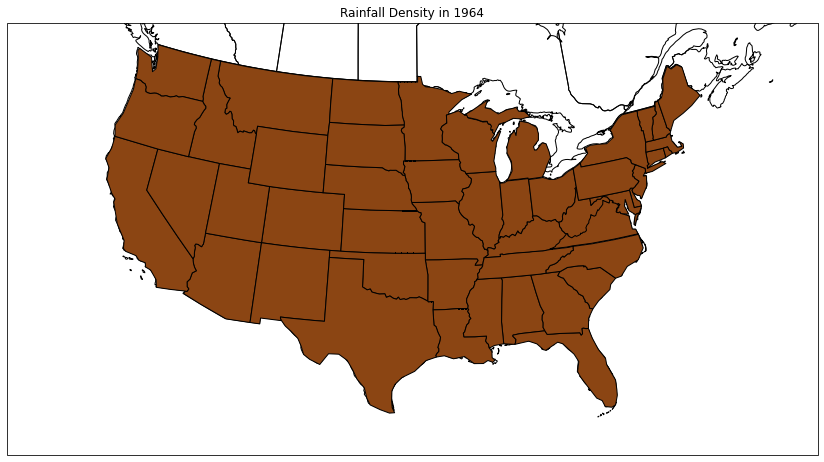

In [3]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.STATES)

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

ax.set_title('Rainfall Density in 1964')

for astate in shpreader.Reader(states_shp).records():
    
    edgecolor = 'black'

    try:
        state_prcp = annual_rainfall_1964[ astate.attributes['name'] ]
    except:
        state_prcp = 0
    
    if state_prcp < 8:
        facecolor = "saddlebrown"
    elif 8 < state_prcp < 10:
        facecolor = "sienna"
    elif 10 < state_prcp < 15:
        facecolor = "peru"
    elif 15 < state_prcp < 20:
        facecolor = "burlywood"
    elif 20 < state_prcp < 25:
        facecolor = "wheat"
    elif 25 < state_prcp < 30:
        facecolor = "honeydew"
    elif 30 < state_prcp < 40:
        facecolor = "mediumaquamarine"
    elif 40 < state_prcp < 50:
        facecolor = "teal"
    elif 50 < state_prcp < 60:
        facecolor = "darkcyan"
    elif 60 < state_prcp < 80:
        facecolor = "darkslategrey"
    else:
        facecolor = "darkolivegreen"
    
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(), 
                  facecolor=facecolor, edgecolor=edgecolor)
    
plt.show()

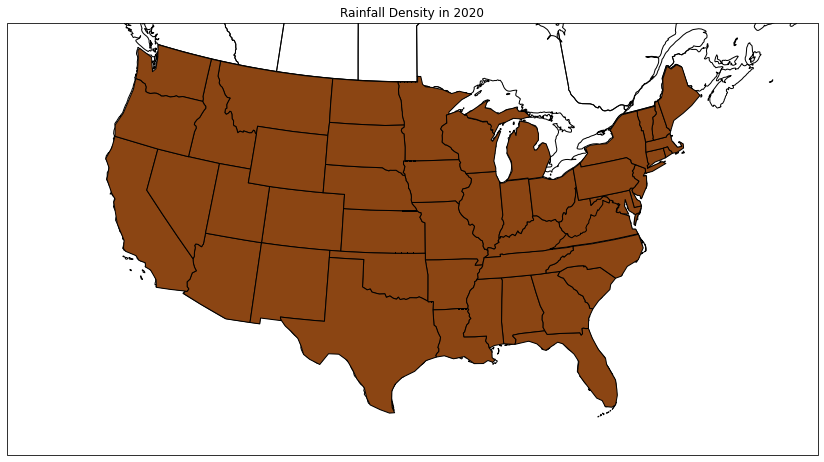

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.add_feature(cfeature.STATES)

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

ax.set_title('Rainfall Density in 2020')

for astate in shpreader.Reader(states_shp).records():
    
    edgecolor = 'black'

    try:
        state_prcp = annual_rainfall_2020[ astate.attributes['name'] ]
    except:
        state_prcp = 0

    if state_prcp < 8:
        facecolor = "saddlebrown"
    elif 8 < state_prcp < 10:
        facecolor = "sienna"
    elif 10 < state_prcp < 15:
        facecolor = "peru"
    elif 15 < state_prcp < 20:
        facecolor = "burlywood"
    elif 20 < state_prcp < 25:
        facecolor = "wheat"
    elif 25 < state_prcp < 30:
        facecolor = "honeydew"
    elif 30 < state_prcp < 40:
        facecolor = "mediumaquamarine"
    elif 40 < state_prcp < 50:
        facecolor = "teal"
    elif 50 < state_prcp < 60:
        facecolor = "darkcyan"
    elif 60 < state_prcp < 80:
        facecolor = "darkslategrey"
    else:
        facecolor = "darkolivegreen"

    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
plt.show()

## Stations Information

In [5]:
url_station1="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00093817&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st1 = pd.read_csv(url_station1, parse_dates=[5])
df_st1['YEAR'] = pd.DatetimeIndex(df_st1['DATE']).year
df_st1 = df_st1.set_index('DATE')
df_st1_before_1964 = df_st1.loc['1948-01-01':'1963-12-31']
df_st1_after_1964 = df_st1.loc['1964-01-01':'2020-12-31']

In [6]:
url_station2="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00093821&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st2 = pd.read_csv(url_station2, parse_dates=[5])
df_st2['YEAR'] = pd.DatetimeIndex(df_st2['DATE']).year
df_st2 = df_st2.set_index('DATE')
df_st2_before_1964 = df_st2.loc['1948-01-01':'1963-12-31']
df_st2_after_1964 = df_st2.loc['1964-01-01':'2020-12-31']

In [7]:
url_station3="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00014821&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st3 = pd.read_csv(url_station3, parse_dates=[5])
df_st3['YEAR'] = pd.DatetimeIndex(df_st3['DATE']).year
df_st3 = df_st3.set_index('DATE')
df_st3_before_1964 = df_st3.loc['1948-01-01':'1963-12-31']
df_st3_after_1964 = df_st3.loc['1964-01-01':'2020-12-31']

In [8]:
url_station4="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00094823&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st4 = pd.read_csv(url_station4, parse_dates=[5])
df_st4['YEAR'] = pd.DatetimeIndex(df_st4['DATE']).year
df_st4 = df_st4.set_index('DATE')
df_st4_before_1964 = df_st4.loc['1948-01-01':'1964-12-31']
df_st4_after_1964 = df_st4.loc['1965-01-01':'2020-12-31']

In [9]:
url_station5="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00003860&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st5 = pd.read_csv(url_station5, parse_dates=[5])
df_st5['YEAR'] = pd.DatetimeIndex(df_st5['DATE']).year
df_st5 = df_st5.set_index('DATE')
df_st5_before_1964 = df_st5.loc['1948-01-01':'1964-12-31']
df_st5_after_1964 = df_st5.loc['1965-01-01':'2020-12-31']

In [10]:
url_station6="https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=PRCP&stations=USW00013897&startDate=1948-01-01&endDate=2020-12-31&boundingBox=90,-180,-90,180&includeStationName=true&includeStationLocation=true&units=standard"
df_st6 = pd.read_csv(url_station6, parse_dates=[5])
df_st6['YEAR'] = pd.DatetimeIndex(df_st6['DATE']).year
df_st6 = df_st6.set_index('DATE')
df_st6_before_1964 = df_st6.loc['1948-01-01':'1963-12-31']
df_st6_after_1964 = df_st6.loc['1964-01-01':'2020-12-31']

In [11]:
stations = {'STATION': [df_st1.STATION.iloc[0], df_st2.STATION.iloc[0], df_st3.STATION.iloc[0], df_st4.STATION.iloc[0], df_st5.STATION.iloc[0], df_st6.STATION.iloc[0]],
            'NAME': [df_st1.NAME.iloc[0], df_st2.NAME.iloc[0], df_st3.NAME.iloc[0], df_st4.NAME.iloc[0], df_st5.NAME.iloc[0], df_st6.NAME.iloc[0]],
            'LATITUDE': [df_st1.LATITUDE.iloc[0], df_st2.LATITUDE.iloc[0], df_st3.LATITUDE.iloc[0], df_st4.LATITUDE.iloc[0], df_st5.LATITUDE.iloc[0], df_st6.LATITUDE.iloc[0]],
            'LONGITUDE':[df_st1.LONGITUDE.iloc[0], df_st2.LONGITUDE.iloc[0], df_st3.LONGITUDE.iloc[0], df_st4.LONGITUDE.iloc[0], df_st5.LONGITUDE.iloc[0], df_st6.LONGITUDE.iloc[0]]
            }
df_stations = pd.DataFrame(stations)
df_stations

,STATION,NAME,LATITUDE,LONGITUDE
0,USW00093817,"EVANSVILLE REGIONAL AIRPORT, IN US",38.04410,-87.52050
1,USW00093821,"LOUISVILLE INTERNATIONAL AIRPORT, KY US",38.18110,-85.73910
2,USW00014821,"JOHN GLENN INTERNATIONAL AIRPORT, OH US",39.99070,-82.87700
3,USW00094823,"PITTSBURGH ASOS, PA US",40.48460,-80.21440
4,USW00003860,"HUNTINGTON TRI STATE AIRPORT, WV US",38.36532,-82.55485
5,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",36.11889,-86.68917


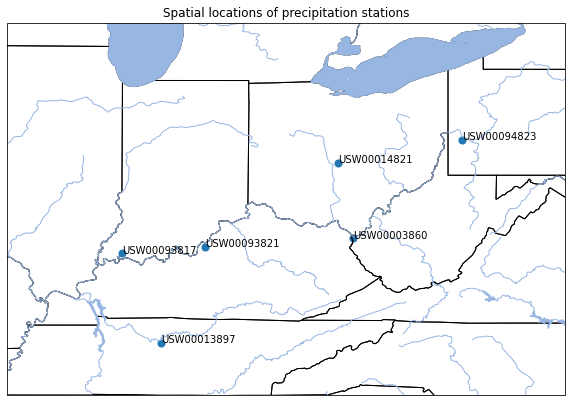

In [12]:
fig = plt.figure(figsize=(10, 9))
projection=ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.set_extent([-90, -78, 35, 43], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.set_title('Spatial locations of precipitation stations')
ax.scatter(df_stations.LONGITUDE, df_stations.LATITUDE, s=50)
for i, txt in enumerate(df_stations.STATION):
    ax.annotate(txt, (df_stations.LONGITUDE[i], df_stations.LATITUDE[i]))

 The reason to choose these stations are as follows:(1) These stations are situated in the large city by the river with high urban population, which means these cities have a greater chance of being hit by flood. (2) These stations have common precipitation values from 1948-2020 and are all from local airport to ensure the consistency and reliability of the data. (3) These stations are located in different states and relatively far from each other. 

## scatterplots based on the annual precipitation and linear trends

In [13]:
df_st1_year_mean = df_st1.PRCP.groupby(df_st1.YEAR).sum().reset_index()
df_st2_year_mean = df_st2.PRCP.groupby(df_st2.YEAR).sum().reset_index()
df_st3_year_mean = df_st3.PRCP.groupby(df_st3.YEAR).sum().reset_index()
df_st4_year_mean = df_st4.PRCP.groupby(df_st4.YEAR).sum().reset_index()
df_st5_year_mean = df_st5.PRCP.groupby(df_st5.YEAR).sum().reset_index()
df_st6_year_mean = df_st6.PRCP.groupby(df_st6.YEAR).sum().reset_index()

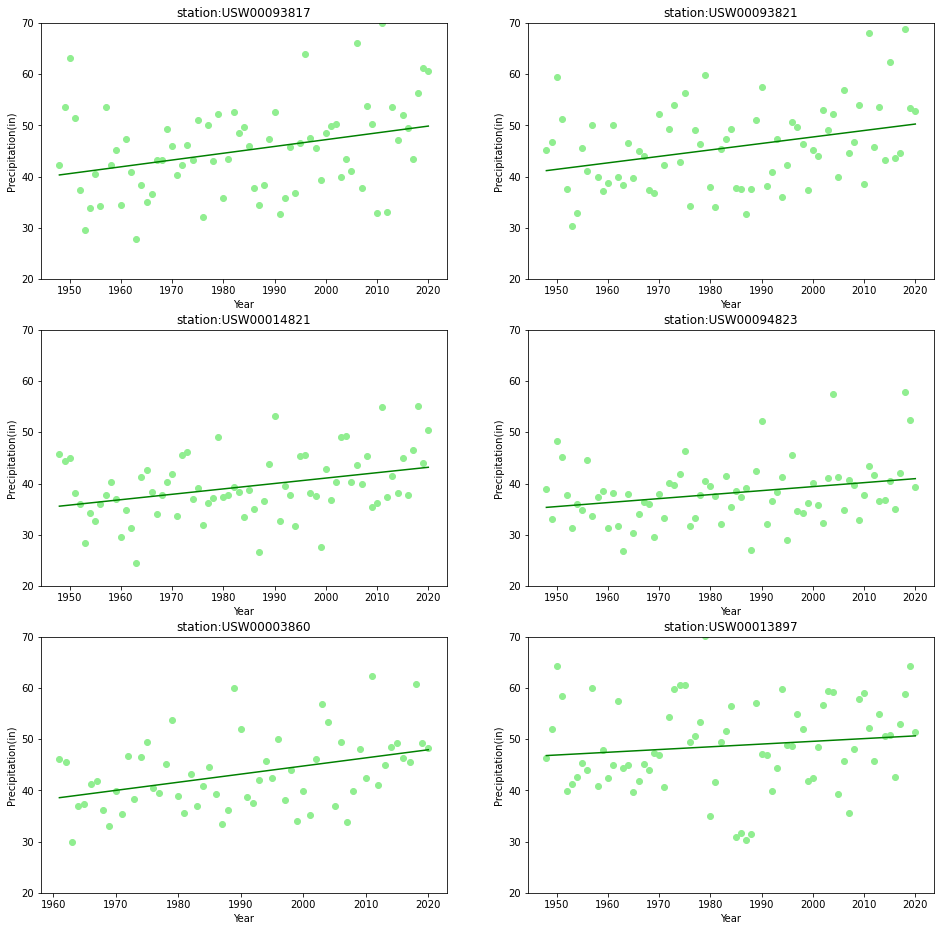

In [14]:
df_st1_year_meanfig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0,0].scatter(df_st1_year_mean['YEAR'], df_st1_year_mean['PRCP'], marker='o', c='lightgreen')
m1, b1 = np.polyfit(df_st1_year_mean['YEAR'], df_st1_year_mean['PRCP'], 1)
axes[0,0].plot(df_st1_year_mean['YEAR'], m1*df_st1_year_mean['YEAR'] + b1, c='green')
axes[0,0].set_ylim((20,70))
axes[0,0].set_title('station:USW00093817')
axes[0,0].set_ylabel('Precipitation(in)')
axes[0,0].set_xlabel('Year')

axes[0,1].scatter(df_st2_year_mean['YEAR'], df_st2_year_mean['PRCP'], marker='o', c='lightgreen')
m2, b2 = np.polyfit(df_st2_year_mean['YEAR'], df_st2_year_mean['PRCP'], 1)
axes[0,1].plot(df_st2_year_mean['YEAR'], m2*df_st2_year_mean['YEAR'] + b2, c='green')
axes[0,1].set_ylim((20,70))
axes[0,1].set_title('station:USW00093821')
axes[0,1].set_ylabel('Precipitation(in)')
axes[0,1].set_xlabel('Year')

axes[1,0].scatter(df_st3_year_mean['YEAR'], df_st3_year_mean['PRCP'], marker='o', c='lightgreen')
m3, b3 = np.polyfit(df_st3_year_mean['YEAR'], df_st3_year_mean['PRCP'], 1)
axes[1,0].plot(df_st3_year_mean['YEAR'], m3*df_st3_year_mean['YEAR'] + b3, c='green')
axes[1,0].set_ylim((20,70))
axes[1,0].set_title('station:USW00014821')
axes[1,0].set_ylabel('Precipitation(in)')
axes[1,0].set_xlabel('Year')

axes[1,1].scatter(df_st4_year_mean['YEAR'], df_st4_year_mean['PRCP'], marker='o', c='lightgreen')
m4, b4 = np.polyfit(df_st4_year_mean['YEAR'], df_st4_year_mean['PRCP'], 1)
axes[1,1].plot(df_st4_year_mean['YEAR'], m4*df_st4_year_mean['YEAR'] + b4, c='green')
axes[1,1].set_ylim((20,70))
axes[1,1].set_title('station:USW00094823')
axes[1,1].set_ylabel('Precipitation(in)')
axes[1,1].set_xlabel('Year')

axes[2,0].scatter(df_st5_year_mean['YEAR'], df_st5_year_mean['PRCP'], marker='o', c='lightgreen')
m5, b5 = np.polyfit(df_st5_year_mean['YEAR'], df_st5_year_mean['PRCP'], 1)
axes[2,0].plot(df_st5_year_mean['YEAR'], m5*df_st5_year_mean['YEAR'] + b5, c='green')
axes[2,0].set_ylim((20,70))
axes[2,0].set_title('station:USW00003860')
axes[2,0].set_ylabel('Precipitation(in)')
axes[2,0].set_xlabel('Year')

axes[2,1].scatter(df_st6_year_mean['YEAR'], df_st6_year_mean['PRCP'], marker='o', c='lightgreen')
m6, b6 = np.polyfit(df_st6_year_mean['YEAR'], df_st6_year_mean['PRCP'], 1)
axes[2,1].plot(df_st6_year_mean['YEAR'], m6*df_st6_year_mean['YEAR'] + b6, c='green')
axes[2,1].set_ylim((20,70))
axes[2,1].set_title('station:USW00013897')
axes[2,1].set_ylabel('Precipitation(in)')
axes[2,1].set_xlabel('Year');

In [15]:
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(df_st1_year_mean['YEAR'],df_st1_year_mean['PRCP'])
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(df_st2_year_mean['YEAR'],df_st2_year_mean['PRCP'])
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(df_st3_year_mean['YEAR'],df_st3_year_mean['PRCP'])
slope_4, intercept_4, r_value_4, p_value_4, std_err_4 = stats.linregress(df_st4_year_mean['YEAR'],df_st4_year_mean['PRCP'])
slope_5, intercept_5, r_value_5, p_value_5, std_err_5 = stats.linregress(df_st5_year_mean['YEAR'],df_st5_year_mean['PRCP'])
slope_6, intercept_6, r_value_6, p_value_6, std_err_6 = stats.linregress(df_st6_year_mean['YEAR'],df_st6_year_mean['PRCP'])
display("coefficient of determination", r_value_1**2, r_value_2**2, r_value_3**2, r_value_4**2, r_value_5**2, r_value_6**2)

'coefficient of determination'

0.10105639314264109

0.10993678739985008

0.1262246324192895

0.07457546097353451

0.15207734444201806

0.01752515337186758

The scatterplots based on the annual precipitation are shown for selected stations. It can be seen that for all the stations, the annual precipitation had a relative lower variation with a minimum around 30 inches to a maximum of 70 inches. The linear trend for annual precipitation indicated an increasing pattern for these stations.The slope of linear trend for station 6 was smaller compared to stations.

## Scatterplots based on the annual rainy days at different thresholds(0.5, 1, and 2 inches) for precipitation

In [16]:
df_st1_filtered_1 = df_st1[df_st1.PRCP > 0.5].PRCP.groupby(df_st1.YEAR).count().reset_index()
df_st2_filtered_1 = df_st2[df_st2.PRCP > 0.5].PRCP.groupby(df_st2.YEAR).count().reset_index()
df_st3_filtered_1 = df_st3[df_st3.PRCP > 0.5].PRCP.groupby(df_st3.YEAR).count().reset_index()
df_st4_filtered_1 = df_st4[df_st4.PRCP > 0.5].PRCP.groupby(df_st4.YEAR).count().reset_index()
df_st5_filtered_1 = df_st5[df_st5.PRCP > 0.5].PRCP.groupby(df_st5.YEAR).count().reset_index()
df_st6_filtered_1 = df_st6[df_st6.PRCP > 0.5].PRCP.groupby(df_st6.YEAR).count().reset_index()

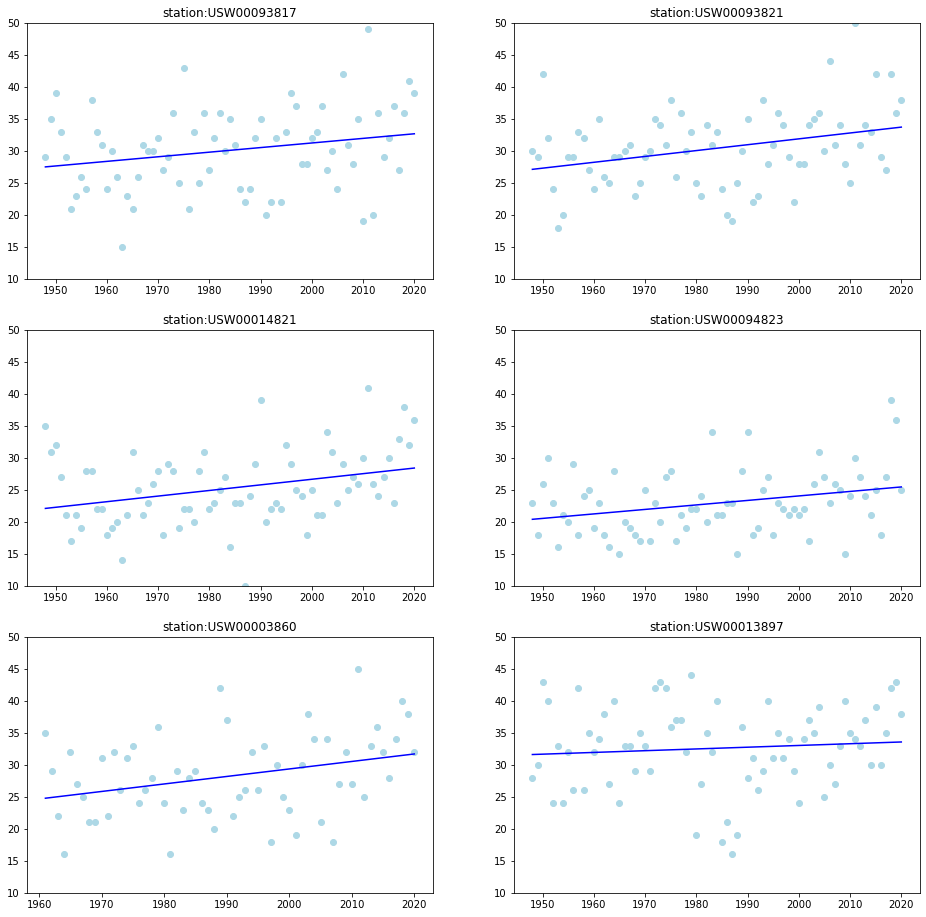

In [17]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0,0].scatter(df_st1_filtered_1['YEAR'], df_st1_filtered_1['PRCP'], marker='o', c='lightblue')
m1, b1 = np.polyfit(df_st1_filtered_1['YEAR'], df_st1_filtered_1['PRCP'], 1)
axes[0,0].plot(df_st1_filtered_1['YEAR'], m1*df_st1_filtered_1['YEAR'] + b1, c='blue')
axes[0,0].set_ylim((10,50))
axes[0,0].set_title('station:USW00093817')

axes[0,1].scatter(df_st2_filtered_1['YEAR'], df_st2_filtered_1['PRCP'], marker='o', c='lightblue')
m2, b2 = np.polyfit(df_st2_filtered_1['YEAR'], df_st2_filtered_1['PRCP'], 1)
axes[0,1].plot(df_st2_filtered_1['YEAR'], m2*df_st2_filtered_1['YEAR'] + b2, c='blue')
axes[0,1].set_ylim((10,50))
axes[0,1].set_title('station:USW00093821')

axes[1,0].scatter(df_st3_filtered_1['YEAR'], df_st3_filtered_1['PRCP'], marker='o', c='lightblue')
m3, b3 = np.polyfit(df_st3_filtered_1['YEAR'], df_st3_filtered_1['PRCP'], 1)
axes[1,0].plot(df_st3_filtered_1['YEAR'], m3*df_st3_filtered_1['YEAR'] + b3, c='blue')
axes[1,0].set_ylim((10,50))
axes[1,0].set_title('station:USW00014821')

axes[1,1].scatter(df_st4_filtered_1['YEAR'], df_st4_filtered_1['PRCP'], marker='o', c='lightblue')
m4, b4 = np.polyfit(df_st4_filtered_1['YEAR'], df_st4_filtered_1['PRCP'], 1)
axes[1,1].plot(df_st4_filtered_1['YEAR'], m4*df_st4_filtered_1['YEAR'] + b4, c='blue')
axes[1,1].set_ylim((10,50))
axes[1,1].set_title('station:USW00094823')

axes[2,0].scatter(df_st5_filtered_1['YEAR'], df_st5_filtered_1['PRCP'], marker='o', c='lightblue')
m5, b5 = np.polyfit(df_st5_filtered_1['YEAR'], df_st5_filtered_1['PRCP'], 1)
axes[2,0].plot(df_st5_filtered_1['YEAR'], m5*df_st5_filtered_1['YEAR'] + b5, c='blue')
axes[2,0].set_ylim((10,50))
axes[2,0].set_title('station:USW00003860')

axes[2,1].scatter(df_st6_filtered_1['YEAR'], df_st6_filtered_1['PRCP'], marker='o', c='lightblue')
m6, b6 = np.polyfit(df_st6_filtered_1['YEAR'], df_st6_filtered_1['PRCP'], 1)
axes[2,1].plot(df_st6_filtered_1['YEAR'], m6*df_st6_filtered_1['YEAR'] + b6, c='blue')
axes[2,1].set_ylim((10,50))
axes[2,1].set_title('station:USW00013897');

In [18]:
df_st1_filtered_2 = df_st1[df_st1.PRCP > 1].PRCP.groupby(df_st1.YEAR).count().reset_index()
df_st2_filtered_2 = df_st2[df_st2.PRCP > 1].PRCP.groupby(df_st2.YEAR).count().reset_index()
df_st3_filtered_2 = df_st3[df_st3.PRCP > 1].PRCP.groupby(df_st3.YEAR).count().reset_index()
df_st4_filtered_2 = df_st4[df_st4.PRCP > 1].PRCP.groupby(df_st4.YEAR).count().reset_index()
df_st5_filtered_2 = df_st5[df_st5.PRCP > 1].PRCP.groupby(df_st5.YEAR).count().reset_index()
df_st6_filtered_2 = df_st6[df_st6.PRCP > 1].PRCP.groupby(df_st6.YEAR).count().reset_index()

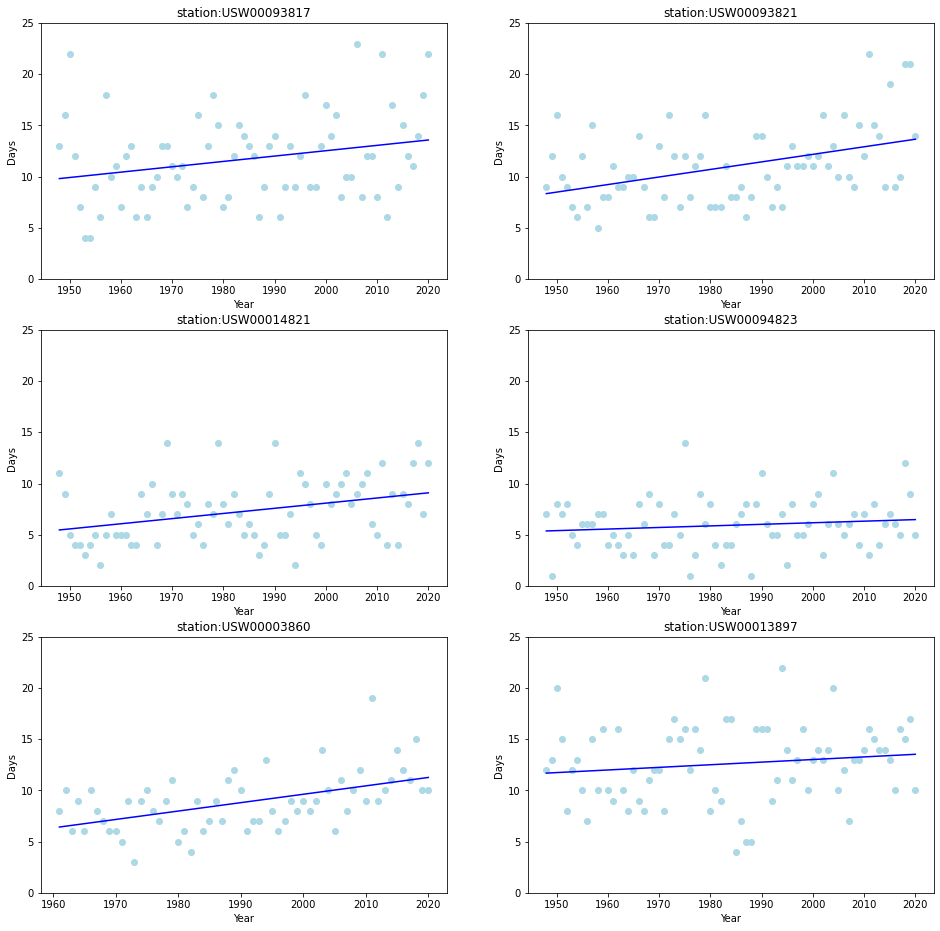

In [19]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0,0].scatter(df_st1_filtered_2['YEAR'], df_st1_filtered_2['PRCP'], marker='o', c='lightblue')
m1, b1 = np.polyfit(df_st1_filtered_2['YEAR'], df_st1_filtered_2['PRCP'], 1)
axes[0,0].plot(df_st1_filtered_2['YEAR'], m1*df_st1_filtered_2['YEAR'] + b1, c='blue')
axes[0,0].set_ylim((0,25))
axes[0,0].set_title('station:USW00093817')
axes[0,0].set_ylabel('Days')
axes[0,0].set_xlabel('Year')

axes[0,1].scatter(df_st2_filtered_2['YEAR'], df_st2_filtered_2['PRCP'], marker='o', c='lightblue')
m2, b2 = np.polyfit(df_st2_filtered_2['YEAR'], df_st2_filtered_2['PRCP'], 1)
axes[0,1].plot(df_st2_filtered_2['YEAR'], m2*df_st2_filtered_2['YEAR'] + b2, c='blue')
axes[0,1].set_ylim((0,25))
axes[0,1].set_title('station:USW00093821')
axes[0,1].set_ylabel('Days')
axes[0,1].set_xlabel('Year')

axes[1,0].scatter(df_st3_filtered_2['YEAR'], df_st3_filtered_2['PRCP'], marker='o', c='lightblue')
m3, b3 = np.polyfit(df_st3_filtered_2['YEAR'], df_st3_filtered_2['PRCP'], 1)
axes[1,0].plot(df_st3_filtered_2['YEAR'], m3*df_st3_filtered_2['YEAR'] + b3, c='blue')
axes[1,0].set_ylim((0,25))
axes[1,0].set_title('station:USW00014821')
axes[1,0].set_ylabel('Days')
axes[1,0].set_xlabel('Year')

axes[1,1].scatter(df_st4_filtered_2['YEAR'], df_st4_filtered_2['PRCP'], marker='o', c='lightblue')
m4, b4 = np.polyfit(df_st4_filtered_2['YEAR'], df_st4_filtered_2['PRCP'], 1)
axes[1,1].plot(df_st4_filtered_2['YEAR'], m4*df_st4_filtered_2['YEAR'] + b4, c='blue')
axes[1,1].set_ylim((0,25))
axes[1,1].set_title('station:USW00094823')
axes[1,1].set_ylabel('Days')
axes[1,1].set_xlabel('Year')

axes[2,0].scatter(df_st5_filtered_2['YEAR'], df_st5_filtered_2['PRCP'], marker='o', c='lightblue')
m5, b5 = np.polyfit(df_st5_filtered_2['YEAR'], df_st5_filtered_2['PRCP'], 1)
axes[2,0].plot(df_st5_filtered_2['YEAR'], m5*df_st5_filtered_2['YEAR'] + b5, c='blue')
axes[2,0].set_ylim((0,25))
axes[2,0].set_title('station:USW00003860')
axes[2,0].set_ylabel('Days')
axes[2,0].set_xlabel('Year')

axes[2,1].scatter(df_st6_filtered_2['YEAR'], df_st6_filtered_2['PRCP'], marker='o', c='lightblue')
m6, b6 = np.polyfit(df_st6_filtered_2['YEAR'], df_st6_filtered_2['PRCP'], 1)
axes[2,1].plot(df_st6_filtered_2['YEAR'], m6*df_st6_filtered_2['YEAR'] + b6, c='blue')
axes[2,1].set_ylim((0,25))
axes[2,1].set_title('station:USW00013897')
axes[2,1].set_ylabel('Days')
axes[2,1].set_xlabel('Year');

In [20]:
df_st1_filtered_3 = df_st1[df_st1.PRCP > 2].PRCP.groupby(df_st1.YEAR).count().reset_index()
df_st2_filtered_3 = df_st2[df_st2.PRCP > 2].PRCP.groupby(df_st2.YEAR).count().reset_index()
df_st3_filtered_3 = df_st3[df_st3.PRCP > 2].PRCP.groupby(df_st3.YEAR).count().reset_index()
df_st4_filtered_3 = df_st4[df_st4.PRCP > 2].PRCP.groupby(df_st4.YEAR).count().reset_index()
df_st5_filtered_3 = df_st5[df_st5.PRCP > 2].PRCP.groupby(df_st5.YEAR).count().reset_index()
df_st6_filtered_3 = df_st6[df_st6.PRCP > 2].PRCP.groupby(df_st6.YEAR).count().reset_index()

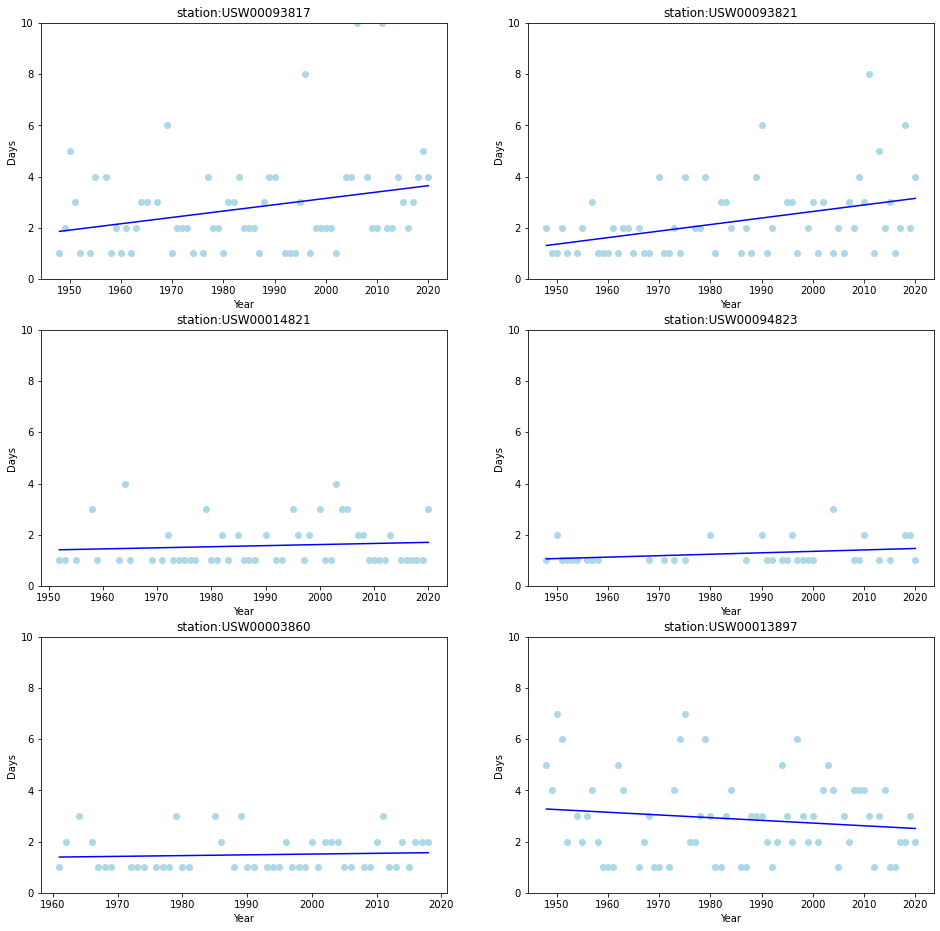

In [21]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 16))

axes[0,0].scatter(df_st1_filtered_3['YEAR'], df_st1_filtered_3['PRCP'], marker='o', c='lightblue')
m1, b1 = np.polyfit(df_st1_filtered_3['YEAR'], df_st1_filtered_3['PRCP'], 1)
axes[0,0].plot(df_st1_filtered_3['YEAR'], m1*df_st1_filtered_3['YEAR'] + b1, c='blue')
axes[0,0].set_ylim((0,10))
axes[0,0].set_title('station:USW00093817')
axes[0,0].set_ylabel('Days')
axes[0,0].set_xlabel('Year')

axes[0,1].scatter(df_st2_filtered_3['YEAR'], df_st2_filtered_3['PRCP'], marker='o', c='lightblue')
m2, b2 = np.polyfit(df_st2_filtered_3['YEAR'], df_st2_filtered_3['PRCP'], 1)
axes[0,1].plot(df_st2_filtered_3['YEAR'], m2*df_st2_filtered_3['YEAR'] + b2, c='blue')
axes[0,1].set_ylim((0,10))
axes[0,1].set_title('station:USW00093821')
axes[0,1].set_ylabel('Days')
axes[0,1].set_xlabel('Year')

axes[1,0].scatter(df_st3_filtered_3['YEAR'], df_st3_filtered_3['PRCP'], marker='o', c='lightblue')
m3, b3 = np.polyfit(df_st3_filtered_3['YEAR'], df_st3_filtered_3['PRCP'], 1)
axes[1,0].plot(df_st3_filtered_3['YEAR'], m3*df_st3_filtered_3['YEAR'] + b3, c='blue')
axes[1,0].set_ylim((0,10))
axes[1,0].set_title('station:USW00014821')
axes[1,0].set_ylabel('Days')
axes[1,0].set_xlabel('Year')

axes[1,1].scatter(df_st4_filtered_3['YEAR'], df_st4_filtered_3['PRCP'], marker='o', c='lightblue')
m4, b4 = np.polyfit(df_st4_filtered_3['YEAR'], df_st4_filtered_3['PRCP'], 1)
axes[1,1].plot(df_st4_filtered_3['YEAR'], m4*df_st4_filtered_3['YEAR'] + b4, c='blue')
axes[1,1].set_ylim((0,10))
axes[1,1].set_title('station:USW00094823')
axes[1,1].set_ylabel('Days')
axes[1,1].set_xlabel('Year')

axes[2,0].scatter(df_st5_filtered_3['YEAR'], df_st5_filtered_3['PRCP'], marker='o', c='lightblue')
m5, b5 = np.polyfit(df_st5_filtered_3['YEAR'], df_st5_filtered_3['PRCP'], 1)
axes[2,0].plot(df_st5_filtered_3['YEAR'], m5*df_st5_filtered_3['YEAR'] + b5, c='blue')
axes[2,0].set_ylim((0,10))
axes[2,0].set_title('station:USW00003860')
axes[2,0].set_ylabel('Days')
axes[2,0].set_xlabel('Year')

axes[2,1].scatter(df_st6_filtered_3['YEAR'], df_st6_filtered_3['PRCP'], marker='o', c='lightblue')
m6, b6 = np.polyfit(df_st6_filtered_3['YEAR'], df_st6_filtered_3['PRCP'], 1)
axes[2,1].plot(df_st6_filtered_3['YEAR'], m6*df_st6_filtered_3['YEAR'] + b6, c='blue')
axes[2,1].set_ylim((0,10))
axes[2,1].set_title('station:USW00013897')
axes[2,1].set_ylabel('Days')
axes[2,1].set_xlabel('Year');

In [22]:
slope_7, intercept_7, r_value_7, p_value_7, std_err_7 = stats.linregress(df_st6_filtered_3['YEAR'], df_st6_filtered_3['PRCP'])
display("coefficient of determination for the decreasing trend", r_value_7**2)

'coefficient of determination for the decreasing trend'

0.019615331206418177

The maximum number of annual rainy days varied between 10 and 50, based on the 0.5 inch threshold. When the threshold increased to 1 inch, the number of annual rainy days varied between 2 and 25, and in the case of the 2 inch threshold level, it varied between 0 and 10. An increasing trend was observed for stations except for station 6, which shows decreasing trend in the case of the 2 inch threshold level .

## Rainfall Amount-Return Period-Duration Analysis

In [23]:
def i_1day(period):
    rainfall = period.groupby(period.YEAR).PRCP.aggregate(np.max)
    rainfall_log = np.log10(rainfall)
    rainfall_mean = np.mean(rainfall_log)
    rainfall_std = np.std(rainfall_log)
    z = return_period_year_z
    Q = np.power(10, rainfall_mean+rainfall_std*z)
    return Q

In [24]:
def i_7day(period):
    period = period.reset_index()
    d = {'DATE': 'first', 'PRCP': 'sum'}
    period_groupby = period.groupby(period.index // 7).agg(d).reset_index()
    period_groupby['YEAR'] = pd.DatetimeIndex(period_groupby['DATE']).year
    rainfall = period_groupby.groupby(period_groupby.YEAR).PRCP.aggregate(np.max)
    rainfall_log = np.log10(rainfall)
    rainfall_mean = np.mean(rainfall_log)
    rainfall_std = np.std(rainfall_log)
    z = return_period_year_z
    Q = np.power(10, rainfall_mean+rainfall_std*z)
    return Q

In [25]:
def i_30day(period):
    period = period.reset_index()
    d = {'DATE': 'first', 'PRCP': 'sum'}
    period_groupby = period.groupby(period.index // 30).agg(d).reset_index()
    period_groupby['YEAR'] = pd.DatetimeIndex(period_groupby['DATE']).year
    rainfall = period_groupby.groupby(period_groupby.YEAR).PRCP.aggregate(np.max)
    rainfall_log = np.log10(rainfall)
    rainfall_mean = np.mean(rainfall_log)
    rainfall_std = np.std(rainfall_log)
    z = return_period_year_z
    Q = np.power(10, rainfall_mean+rainfall_std*z)
    return Q

In [26]:
return_period_year = np.array([20, 40, 60, 80, 100])
return_period_year_F = 1-1/return_period_year
return_period_year_z = ndtri(return_period_year_F)

In [27]:
df_st1_1day_i = i_1day(df_st1) 
df_st1_1day_before_1964_i = i_1day(df_st1_before_1964) 
df_st1_1day_after_1964_i = i_1day(df_st1_after_1964) 

In [28]:
df_st2_1day_i = i_1day(df_st2) 
df_st2_1day_before_1964_i = i_1day(df_st2_before_1964) 
df_st2_1day_after_1964_i = i_1day(df_st2_after_1964) 

In [29]:
df_st3_1day_i = i_1day(df_st3) 
df_st3_1day_before_1964_i = i_1day(df_st3_before_1964) 
df_st3_1day_after_1964_i = i_1day(df_st3_after_1964) 

In [30]:
display(df_st3_1day_i, df_st3_1day_before_1964_i, df_st3_1day_after_1964_i)

array([3.372711  , 3.66083526, 3.82445844, 3.93891887, 4.02693026])

array([3.38646413, 3.78071883, 4.00946099, 4.17149334, 4.29719093])

array([3.24472854, 3.46915567, 3.59514774, 3.68269297, 3.74969   ])

In [31]:
df_st4_1day_i = i_1day(df_st4) 
df_st4_1day_before_1964_i = i_1day(df_st4_before_1964) 
df_st4_1day_after_1964_i = i_1day(df_st4_after_1964) 

In [32]:
df_st5_1day_i = i_1day(df_st5) 
df_st5_1day_before_1964_i = i_1day(df_st5_before_1964) 
df_st5_1day_after_1964_i = i_1day(df_st5_after_1964) 

In [33]:
df_st6_1day_i = i_1day(df_st6) 
df_st6_1day_before_1964_i = i_1day(df_st6_before_1964) 
df_st6_1day_after_1964_i = i_1day(df_st6_after_1964) 

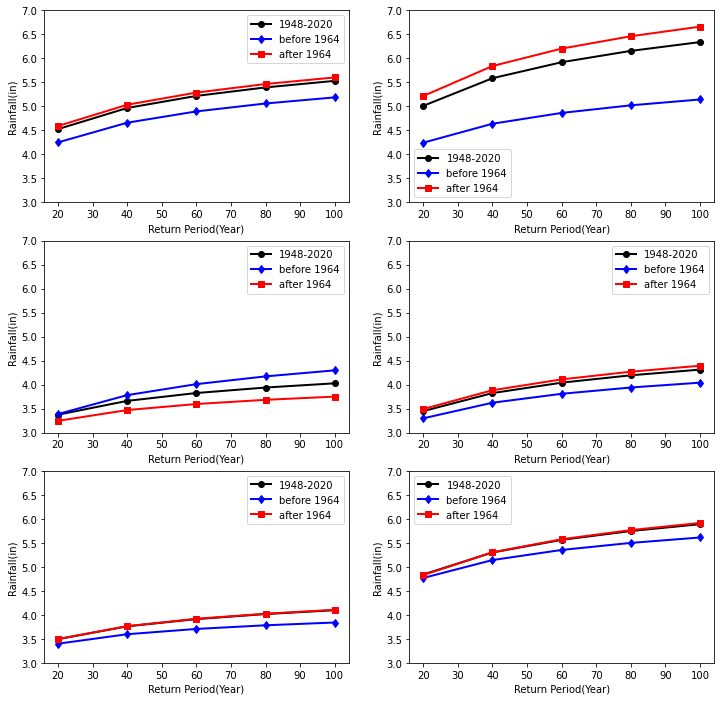

In [34]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 12))

axes[0,0].plot(return_period_year, df_st1_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,0].plot(return_period_year, df_st1_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,0].plot(return_period_year, df_st1_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,0].set_ylim((3,7))
axes[0,0].set_ylabel('Rainfall(in)')
axes[0,0].set_xlabel('Return Period(Year)')
axes[0,0].legend()

axes[0,1].plot(return_period_year, df_st2_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,1].plot(return_period_year, df_st2_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,1].plot(return_period_year, df_st2_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,1].set_ylim((3,7))
axes[0,1].set_ylabel('Rainfall(in)')
axes[0,1].set_xlabel('Return Period(Year)')
axes[0,1].legend()

axes[1,0].plot(return_period_year, df_st3_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,0].plot(return_period_year, df_st3_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,0].plot(return_period_year, df_st3_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,0].set_ylim((3,7))
axes[1,0].set_ylabel('Rainfall(in)')
axes[1,0].set_xlabel('Return Period(Year)')
axes[1,0].legend()

axes[1,1].plot(return_period_year, df_st4_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,1].plot(return_period_year, df_st4_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,1].plot(return_period_year, df_st4_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,1].set_ylim((3,7))
axes[1,1].set_ylabel('Rainfall(in)')
axes[1,1].set_xlabel('Return Period(Year)')
axes[1,1].legend()

axes[2,0].plot(return_period_year, df_st5_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,0].plot(return_period_year, df_st5_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,0].plot(return_period_year, df_st5_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,0].set_ylim((3,7))
axes[2,0].set_ylabel('Rainfall(in)')
axes[2,0].set_xlabel('Return Period(Year)')
axes[2,0].legend()

axes[2,1].plot(return_period_year, df_st6_1day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,1].plot(return_period_year, df_st6_1day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,1].plot(return_period_year, df_st6_1day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,1].set_ylim((3,7))
axes[2,1].set_ylabel('Rainfall(in)')
axes[2,1].set_xlabel('Return Period(Year)')
axes[2,1].legend()

In [35]:
df_st1_7day_i = i_7day(df_st1) 
df_st1_7day_before_1964_i = i_7day(df_st1_before_1964) 
df_st1_7day_after_1964_i = i_7day(df_st1_after_1964) 

In [36]:
df_st2_7day_i = i_7day(df_st2) 
df_st2_7day_before_1964_i = i_7day(df_st2_before_1964) 
df_st2_7day_after_1964_i = i_7day(df_st2_after_1964) 

In [37]:
df_st3_7day_i = i_7day(df_st3) 
df_st3_7day_before_1964_i = i_7day(df_st3_before_1964) 
df_st3_7day_after_1964_i = i_7day(df_st3_after_1964) 

In [38]:
df_st4_7day_i = i_7day(df_st4) 
df_st4_7day_before_1964_i = i_7day(df_st4_before_1964) 
df_st4_7day_after_1964_i = i_7day(df_st4_after_1964) 

In [39]:
df_st5_7day_i = i_7day(df_st5) 
df_st5_7day_before_1964_i = i_7day(df_st5_before_1964) 
df_st5_7day_after_1964_i = i_7day(df_st5_after_1964) 

In [40]:
display(df_st5_7day_i, df_st5_7day_before_1964_i, df_st5_7day_after_1964_i)

array([5.59557727, 6.05081426, 6.30860006, 6.48862901, 6.62689422])

array([5.96742583, 6.49492855, 6.79511656, 7.0053648 , 7.16716859])

array([5.47346099, 5.91974464, 6.17249239, 6.34901597, 6.48459607])

In [41]:
df_st6_7day_i = i_7day(df_st6) 
df_st6_7day_before_1964_i = i_7day(df_st6_before_1964) 
df_st6_7day_after_1964_i = i_7day(df_st6_after_1964) 

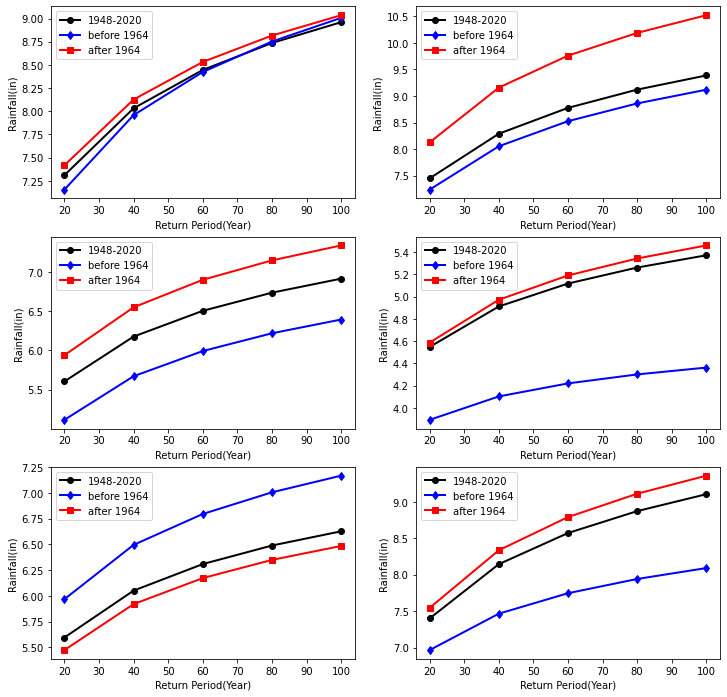

In [42]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 12))

axes[0,0].plot(return_period_year, df_st1_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,0].plot(return_period_year, df_st1_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,0].plot(return_period_year, df_st1_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,0].set_ylabel('Rainfall(in)')
axes[0,0].set_xlabel('Return Period(Year)')
axes[0,0].legend()

axes[0,1].plot(return_period_year, df_st2_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,1].plot(return_period_year, df_st2_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,1].plot(return_period_year, df_st2_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,1].set_ylabel('Rainfall(in)')
axes[0,1].set_xlabel('Return Period(Year)')
axes[0,1].legend()

axes[1,0].plot(return_period_year, df_st3_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,0].plot(return_period_year, df_st3_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,0].plot(return_period_year, df_st3_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,0].set_ylabel('Rainfall(in)')
axes[1,0].set_xlabel('Return Period(Year)')
axes[1,0].legend()

axes[1,1].plot(return_period_year, df_st4_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,1].plot(return_period_year, df_st4_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,1].plot(return_period_year, df_st4_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,1].set_ylabel('Rainfall(in)')
axes[1,1].set_xlabel('Return Period(Year)')
axes[1,1].legend()

axes[2,0].plot(return_period_year, df_st5_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,0].plot(return_period_year, df_st5_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,0].plot(return_period_year, df_st5_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,0].set_ylabel('Rainfall(in)')
axes[2,0].set_xlabel('Return Period(Year)')
axes[2,0].legend()

axes[2,1].plot(return_period_year, df_st6_7day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,1].plot(return_period_year, df_st6_7day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,1].plot(return_period_year, df_st6_7day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,1].set_ylabel('Rainfall(in)')
axes[2,1].set_xlabel('Return Period(Year)')
axes[2,1].legend()

In [43]:
df_st1_30day_i = i_30day(df_st1) 
df_st1_30day_before_1964_i = i_30day(df_st1_before_1964) 
df_st1_30day_after_1964_i = i_30day(df_st1_after_1964) 

In [44]:
display(df_st1_30day_i, df_st1_30day_before_1964_i, df_st1_30day_after_1964_i)

array([12.36568022, 13.46544923, 14.09153558, 14.53013621, 14.8677291 ])

array([12.36644708, 13.65361824, 14.39413742, 14.91610509, 15.31961384])

array([12.19080955, 13.25510833, 13.86030934, 14.28399539, 14.60995461])

In [45]:
df_st2_30day_i = i_30day(df_st2) 
df_st2_30day_before_1964_i = i_30day(df_st2_before_1964) 
df_st2_30day_after_1964_i = i_30day(df_st2_after_1964) 

In [46]:
df_st3_30day_i = i_30day(df_st3) 
df_st3_30day_before_1964_i = i_30day(df_st3_before_1964) 
df_st3_30day_after_1964_i = i_30day(df_st3_after_1964) 

In [47]:
df_st4_30day_i = i_30day(df_st4) 
df_st4_30day_before_1964_i = i_30day(df_st4_before_1964) 
df_st4_30day_after_1964_i = i_30day(df_st4_after_1964) 

In [48]:
df_st5_30day_i = i_30day(df_st5) 
df_st5_30day_before_1964_i = i_30day(df_st5_before_1964) 
df_st5_30day_after_1964_i = i_30day(df_st5_after_1964) 

In [49]:
display(df_st5_30day_i, df_st5_30day_before_1964_i, df_st5_30day_after_1964_i)

array([ 9.78542636, 10.40334639, 10.74875207, 10.98815294, 11.17103788])

array([ 9.30019754,  9.73493848,  9.97508278, 10.14037707, 10.26603419])

array([ 9.14754535,  9.68248512,  9.98050388, 10.18665605, 10.34392368])

In [50]:
df_st6_30day_i = i_30day(df_st6) 
df_st6_30day_before_1964_i = i_30day(df_st6_before_1964) 
df_st6_30day_after_1964_i = i_30day(df_st6_after_1964) 

In [51]:
display(df_st6_30day_i, df_st6_30day_before_1964_i, df_st6_30day_after_1964_i)

array([12.51444327, 13.58511664, 14.1931966 , 14.61859303, 14.94570266])

array([13.24298062, 14.3801379 , 15.026119  , 15.47808822, 15.82566261])

array([12.06790763, 13.16867343, 13.79632497, 14.23643141, 14.57540578])

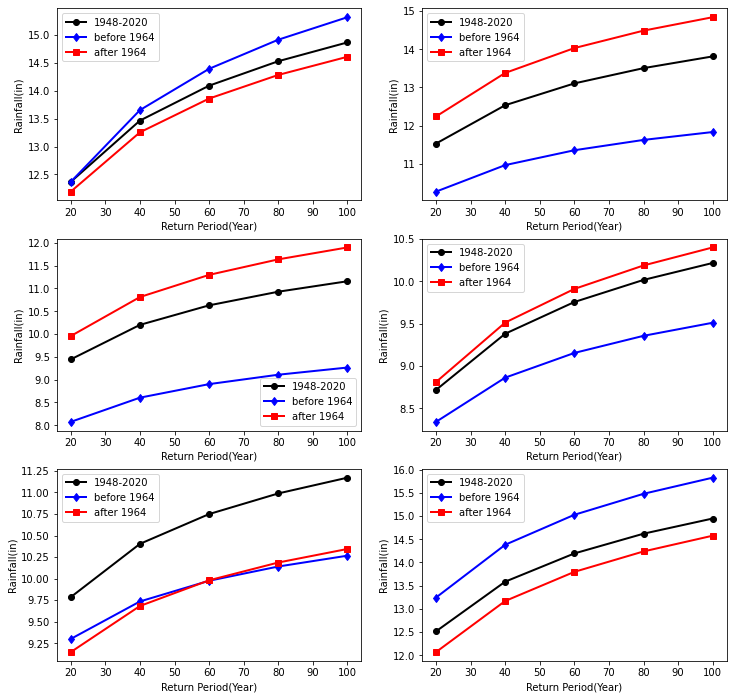

In [52]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 12))

axes[0,0].plot(return_period_year, df_st1_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,0].plot(return_period_year, df_st1_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,0].plot(return_period_year, df_st1_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,0].set_ylabel('Rainfall(in)')
axes[0,0].set_xlabel('Return Period(Year)')
axes[0,0].legend()

axes[0,1].plot(return_period_year, df_st2_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[0,1].plot(return_period_year, df_st2_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[0,1].plot(return_period_year, df_st2_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[0,1].set_ylabel('Rainfall(in)')
axes[0,1].set_xlabel('Return Period(Year)')
axes[0,1].legend()

axes[1,0].plot(return_period_year, df_st3_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,0].plot(return_period_year, df_st3_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,0].plot(return_period_year, df_st3_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,0].set_ylabel('Rainfall(in)')
axes[1,0].set_xlabel('Return Period(Year)')
axes[1,0].legend()

axes[1,1].plot(return_period_year, df_st4_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[1,1].plot(return_period_year, df_st4_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[1,1].plot(return_period_year, df_st4_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[1,1].set_ylabel('Rainfall(in)')
axes[1,1].set_xlabel('Return Period(Year)')
axes[1,1].legend()

axes[2,0].plot(return_period_year, df_st5_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,0].plot(return_period_year, df_st5_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,0].plot(return_period_year, df_st5_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,0].set_ylabel('Rainfall(in)')
axes[2,0].set_xlabel('Return Period(Year)')
axes[2,0].legend()

axes[2,1].plot(return_period_year, df_st6_30day_i, color='black',
                lw=2, label="1948-2020", marker="o")
axes[2,1].plot(return_period_year, df_st6_30day_before_1964_i, color='blue',
                lw=2, label="before 1964", marker="d")
axes[2,1].plot(return_period_year, df_st6_30day_after_1964_i, color='red',
                lw=2, label="after 1964", marker="s")
axes[2,1].set_ylabel('Rainfall(in)')
axes[2,1].set_xlabel('Return Period(Year)')
axes[2,1].legend()